<a href="https://colab.research.google.com/github/arquansa/PSTB-exercises/blob/main/Week06/Day4/EX4/W6D4EX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Recurrent Neural Networks (RNNs)#

Exercises XP
Last Updated: June 10th, 2025

👩‍🏫 👩🏿‍🏫 What You’ll learn
How to import and manipulate time-series data using pandas.
Techniques for handling missing values in time-series data.
Basic data visualization using matplotlib and seaborn.
Building and training a simple LSTM model for time-series data analysis.

🛠️ What you will create
A cleaned and preprocessed time-series dataset.
Visualizations of the time-series data.
A simple LSTM model to analyze and predict time-series data.

Dataset
You will use this Dataset : household_power_consumption. You can find a description of the data here.

All “Part 1,” “Part 2,” etc., sections comprise one comprehensive exercise and are meant to be tackled sequentially as a single, continuous task.

Part 1 : Data Import and Initial Exploration
Import the necessary libraries for data analysis and visualization.
Load the time-series dataset from the provided file.
Display the first few rows of the dataset to understand its structure.
Check the data types of each column and the shape of the dataset.

Part 2 : Handling Missing Values
Identify columns in the dataset that contain missing values.
Fill the missing values using the mean of the respective columns.
Verify that there are no more missing values in the dataset.

Part 3 : Data Visualization
Resample the ‘Global_active_power’ column over a day and plot the sum and mean values.
Create a plot showing the mean and standard deviation of the ‘Global_intensity’ column resampled over a day.

Part 4 : Data Preprocessing for LSTM
Normalize the dataset to prepare it for LSTM model training.
Split the dataset into training and testing sets.
Reshape the data to fit the input requirements of an LSTM model.

Part 5 : Building an LSTM Model
Import the necessary libraries for building an LSTM model.
Define the architecture of the LSTM model, including the number of layers and neurons.
Compile the model with an appropriate loss function and optimizer.

Part 6 : Training and Evaluating the LSTM Model
Train the LSTM model on the training dataset.
Evaluate the model’s performance on the testing dataset.
Plot the training and validation loss to assess the model’s learning progress.


#Part 1 : Data Import and Initial Exploration#

- Import the necessary libraries for data analysis and visualization.
- Load the time-series dataset from the provided file.
- Display the first few rows of the dataset to understand its structure.
- Check the data types of each column and the shape of the dataset.

#Part 1. Data Import and Initial Exploration

Install dependencies

In [37]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Improve visuals
sns.set(style="whitegrid")
plt.style.use("seaborn-v0_8-darkgrid")

Load dataset

In [38]:
df = pd.read_csv("household_power_consumption.txt", delimiter=';', low_memory=False, on_bad_lines='skip')

In [39]:
import pandas as pd
import io

file_path = "household_power_consumption.txt"
data = []
# Read the header separately
with open(file_path, 'r') as f:
    header = f.readline().strip().split(';')
    for line in f:
        # Strip leading/trailing whitespace and split by delimiter
        values = line.strip().split(';')
        # Basic check to ensure the number of columns is consistent
        if len(values) == len(header):
            data.append(values)
        else:
            # Optional: Print problematic lines or log them
            # print(f"Skipping line with incorrect format: {line.strip()}")
            pass

# Create DataFrame
df = pd.DataFrame(data, columns=header)

# Convert 'Date' and 'Time' to datetime
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True, errors='coerce')

# Convert other columns to numeric, coercing errors
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.head())
print("\nData types of each column:")
print(df.dtypes)
print(f"\nDataset shape: {df.shape[0]} rows × {df.shape[1]} columns")

         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0              18.4             0.0             1.0            17.0   
1              23.0             0.0             1.0            16.0   
2              23.0             0.0             2.0            17.0   
3              23.0             0.0             1.0            17.0   
4              15.8             0.0             1.0            17.0   

             Datetime  
0 2006-12-16 17:24:00  
1 2006-12-16 17:25:00  
2 2006-12-16 17:26:0

Explore dataset

In [40]:
print(df.head())
#Display first few rows

         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0              18.4             0.0             1.0            17.0   
1              23.0             0.0             1.0            16.0   
2              23.0             0.0             2.0            17.0   
3              23.0             0.0             1.0            17.0   
4              15.8             0.0             1.0            17.0   

             Datetime  
0 2006-12-16 17:24:00  
1 2006-12-16 17:25:00  
2 2006-12-16 17:26:0

In [41]:

# Check column types and structure
print("\nData types of each column:")
print(df.dtypes)

print(f"\nDataset shape: {df.shape[0]} rows × {df.shape[1]} columns")



Data types of each column:
Date                             object
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Datetime                 datetime64[ns]
dtype: object

Dataset shape: 161986 rows × 10 columns


In [42]:
print(df[['Date', 'Time', 'Datetime']].head())

         Date      Time            Datetime
0  16/12/2006  17:24:00 2006-12-16 17:24:00
1  16/12/2006  17:25:00 2006-12-16 17:25:00
2  16/12/2006  17:26:00 2006-12-16 17:26:00
3  16/12/2006  17:27:00 2006-12-16 17:27:00
4  16/12/2006  17:28:00 2006-12-16 17:28:00


#Part 2 : Handling Missing Values#
- Identify columns in the dataset that contain missing values.
- Fill the missing values using the mean of the respective columns.
- Verify that there are no more missing values in the dataset.

#Part 2. Handling Missing Values#

Missing values have been encoded as ?, and converted to NaN during import:

In [61]:
# Step 1: Identify columns with missing values
missing_counts = df.isnull().sum()
missing_columns = missing_counts[missing_counts > 0]

print("Columns with missing values:")
print(missing_columns)

# Step 2: Fill missing values with column means (only numeric columns)
df_filled = df.copy()
df_filled[missing_columns.index] = df_filled[missing_columns.index].apply(pd.to_numeric, errors='coerce')  # Ensure numeric

df_filled.fillna(df_filled.mean(numeric_only=True), inplace=True)

# Step 3: Verify that all missing values have been handled
print("\nMissing values after filling:")
print(df_filled.isnull().sum())


Columns with missing values:
Global_active_power      116
Global_reactive_power    116
Voltage                  116
Global_intensity         116
Sub_metering_1           116
Sub_metering_2           116
Sub_metering_3           116
dtype: int64

Missing values after filling:
Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
dtype: int64


Explanation of code

| Step                   | What It Does                                                          |
| ---------------------- | --------------------------------------------------------------------- |
| `isnull().sum()`       | Counts `NaN` values in each column                                    |
| `apply(pd.to_numeric)` | Ensures values are numeric (important if `object` dtype was inferred) |
| `fillna(mean)`         | Replaces `NaN` with the column mean                                   |
| `numeric_only=True`    | Ensures that mean calculation only runs on valid columns              |


#Part 3: Visualizing Power Consumption Trends


- Set the Datetime column as the index
- Resample data to daily/weekly/monthly means or sums
- Plot time-series trends
- Optionally: Subset data to specific dates for zoomed-in analysis

#Part 3: Visualizing Power Consumption Trends

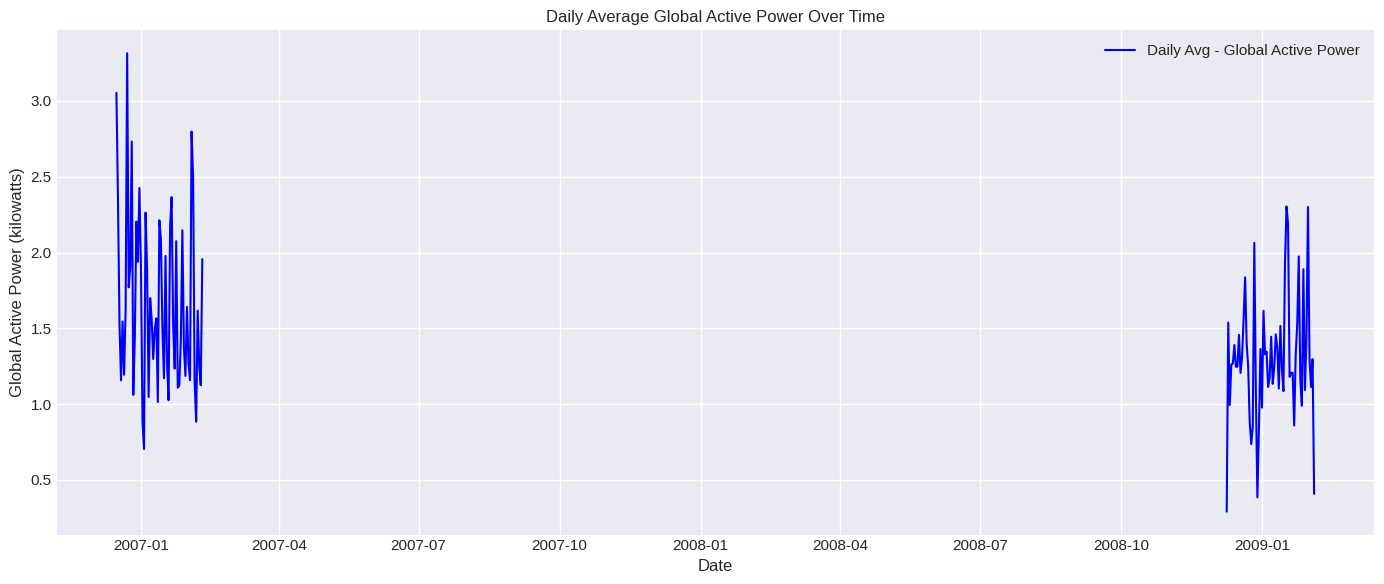

In [44]:
import matplotlib.pyplot as plt

# Step 1: Set 'Datetime' as index
df_filled.set_index('Datetime', inplace=True)

# Step 2: Convert all columns to numeric (in case any are still 'object')
df_filled = df_filled.apply(pd.to_numeric, errors='coerce')

# Step 3: Resample data to daily average
daily_avg = df_filled.resample('D').mean()

# Step 4: Plot Global Active Power over time
plt.figure(figsize=(14, 6))
plt.plot(daily_avg.index, daily_avg['Global_active_power'], label='Daily Avg - Global Active Power', color='blue')
plt.xlabel("Date")
plt.ylabel("Global Active Power (kilowatts)")
plt.title("Daily Average Global Active Power Over Time")
plt.legend()
plt.tight_layout()
plt.show()


Common Resampling Frequencies
Frequency	Code
Daily	  'D'
Weekly	'W'
Monthly	'M'
Hourly	'H'

Optional: Zoom In on a Specific Date Range

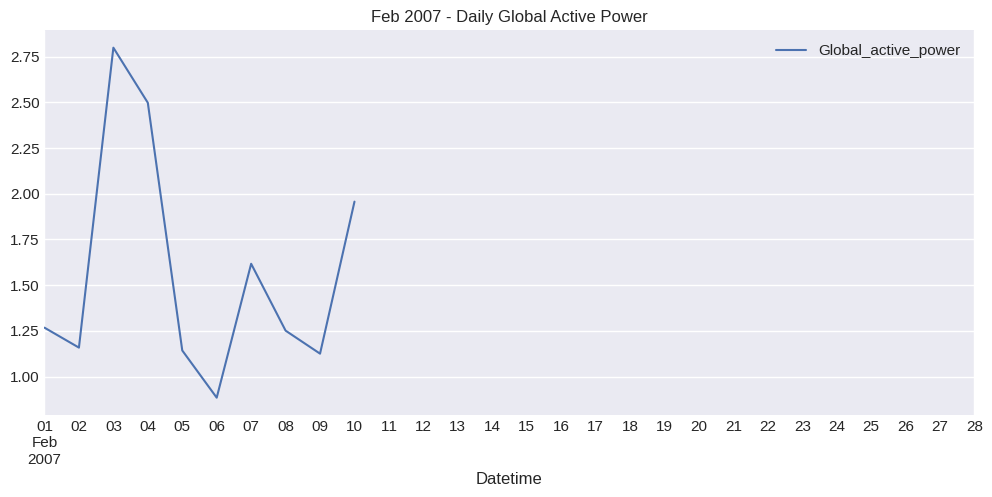

In [45]:
# Example: Zoom in on Feb 2007
subset = daily_avg['2007-02-01':'2007-02-28']
subset.plot(y='Global_active_power', figsize=(12, 5), title='Feb 2007 - Daily Global Active Power')
plt.show()

📈 **1. Visualize Multiple Variables on the Same Plot (Sub-metering)**

We'll plot:

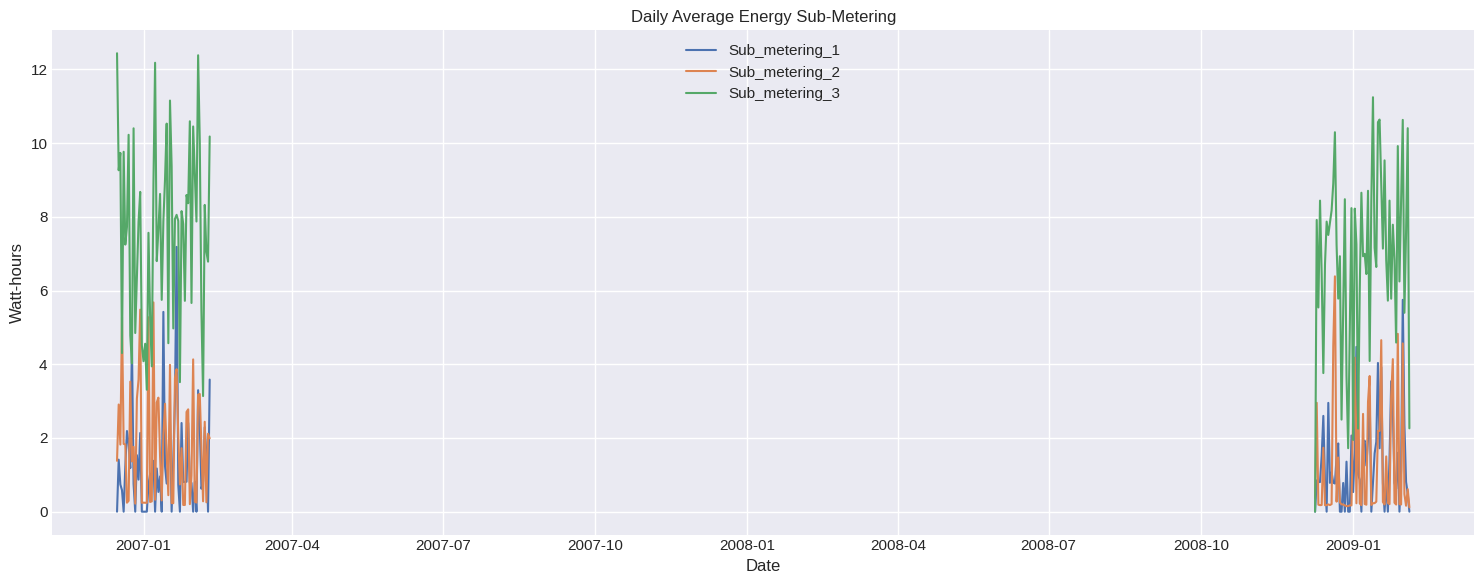

In [46]:
# Plot sub-metering values over time (daily average)
plt.figure(figsize=(15, 6))
plt.plot(daily_avg.index, daily_avg['Sub_metering_1'], label='Sub_metering_1')
plt.plot(daily_avg.index, daily_avg['Sub_metering_2'], label='Sub_metering_2')
plt.plot(daily_avg.index, daily_avg['Sub_metering_3'], label='Sub_metering_3')

plt.title("Daily Average Energy Sub-Metering")
plt.xlabel("Date")
plt.ylabel("Watt-hours")
plt.legend()
plt.tight_layout()
plt.show()


# Part 4 : Data Preprocessing for LSTM
- Normalize the dataset to prepare it for LSTM model training.
- Split the dataset into training and testing sets.
- Reshape the data to fit the input requirements of an LSTM model.

#Part 4: Data Preprocessing for LSTM
LSTM models require input in 3D shape:
[samples, time_steps, features]

Steps:
- Normalize the data
- Create sequences (sliding window approach)
- Split into train/test sets
- Reshape for LSTM input

Global_active_power is used as the target variable, which can be extended to multiple features later.

In [47]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Select the target column and drop NaNs (already handled, but safe)
data = daily_avg[['Global_active_power']].dropna()

# Normalize using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Check shape
print("Normalized data shape:", scaled_data.shape)


Normalized data shape: (115, 1)


#Part 5 : Building an LSTM Model
- Import the necessary libraries for building an LSTM model.
- Define the architecture of the LSTM model, including the number of layers and neurons.
- Compile the model with an appropriate loss function and optimizer.

#Part 5 : Building an LSTM Model

Create Sequences for LSTM

A sliding window of e.g. 7 days is used to predict the next day.

In [48]:
def create_sequences(data, window_size):
    X = []
    y = []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Use 7 days as window
window_size = 7
X, y = create_sequences(scaled_data, window_size)

print("X shape:", X.shape)  # (samples, time_steps, features)
print("y shape:", y.shape)  # (samples, 1)


X shape: (108, 7, 1)
y shape: (108, 1)


 Split into Train and Test Sets

 Use 80% for training, 20% for testing

In [49]:
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"📊 Train size: {X_train.shape}, Test size: {X_test.shape}")


📊 Train size: (86, 7, 1), Test size: (22, 7, 1)


Final Check for LSTM Input
LSTM expects:

X: shape = [samples, time_steps, features] → already correct!

y: shape = [samples, 1] → also done

To be clear:

In [50]:
# Shape should be like: (n_samples, 7 days, 1 feature)
print("LSTM input shape:", X_train.shape)


LSTM input shape: (86, 7, 1)


| Step                                           | Done |
| ---------------------------------------------- | ---- |
| Normalize target feature                       | ✅    |
| Create sequences (sliding window)              | ✅    |
| Split into train/test                          | ✅    |
| Reshape into `[samples, time_steps, features]` | ✅    |


#Part 6 : Training and Evaluating the LSTM Model

- Training & validation loss plot
- Model evaluation on test set
- Clear metric reporting (MSE)



#Part 6 : Training and Evaluating the LSTM Model

Import dependencies

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [57]:
model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [58]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=16,
    verbose=1
)


Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.2187 - val_loss: 0.1620
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1740 - val_loss: 0.1228
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1334 - val_loss: 0.0909
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0861 - val_loss: 0.0634
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0614 - val_loss: 0.0398
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0396 - val_loss: 0.0271
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0265 - val_loss: 0.0327
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0320 - val_loss: 0.0319
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0250 - val_loss: 0.0281
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0268 - val_loss: 0.0271
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0264 - val_loss: 0.0270
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0240 - val_loss: 0.0272
E

Plot Training vs Validation Loss

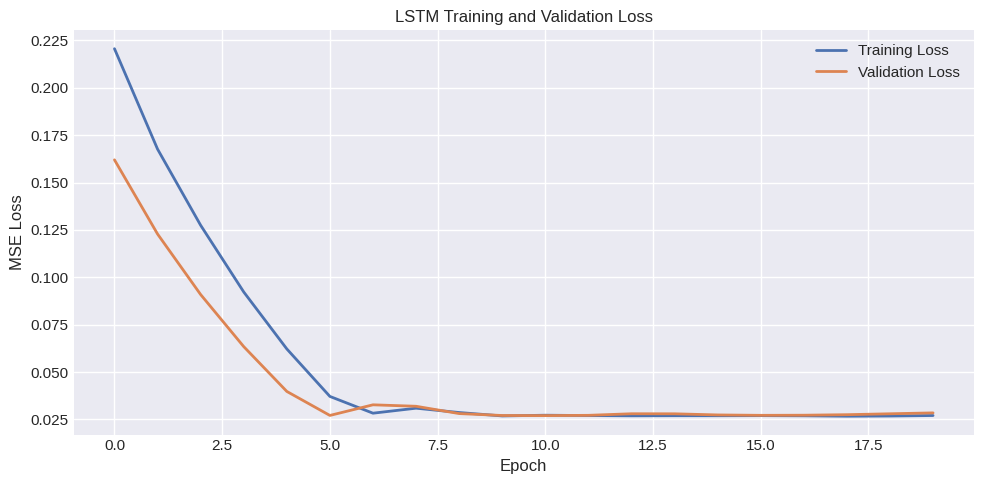

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('LSTM Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


 3. Evaluate Performance on Test Set

In [60]:
from sklearn.metrics import mean_squared_error

# Predict and inverse scale
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Calculate MSE
mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f"📉 Mean Squared Error (MSE) on test set: {mse:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
📉 Mean Squared Error (MSE) on test set: 0.2601


 4. Plot Actual vs Predicted (Again)

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(y_test_inv, label='Actual', color='black')
plt.plot(y_pred_inv, label='Predicted', color='orange')
plt.title('Actual vs Predicted Global Active Power')
plt.xlabel('Time (days)')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.tight_layout()
plt.show()


| Step                               | Status |
| ---------------------------------- | ------ |
| Trained model on LSTM              | ✅      |
| Plotted training & validation loss | ✅      |
| Evaluated on test set with MSE     | ✅      |
| Visualized actual vs predicted     | ✅      |
